In [80]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

In [100]:
movie_data=pd.read_excel(r'F:\数据挖掘学习\dataSet\data.xlsx',header=1,index_col=0)

In [101]:
f=lambda x:float(x.strip('%'))/100
movie_data['avg_star']=5*movie_data['star_five'].map(f)+4*movie_data['star_four'].map(f)+3*movie_data['star_three'].map(f)+2*movie_data['star_two'].map(f)+movie_data['star_one'].map(f)

In [102]:
movie_data.head()

,rank,movie_name,director,main_actor,score,year,type,country,language,Introduction,review,star_five,star_four,star_three,star_two,star_one,avg_star
0,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,918864,82.2%,15.6%,2.0%,0.1%,0.1%,4.797
2,2,霸王别姬,陈凯歌,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷...,9.5,1993,剧情 / 爱情 / 同性,中国大陆 / 香港,汉语普通话,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,663075,79.4%,17.7%,2.7%,0.2%,0.1%,4.764
3,3,这个杀手不太冷,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,872569,73.8%,22.5%,3.4%,0.2%,0.1%,4.697
4,4,阿甘正传,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,742289,73.9%,22.2%,3.5%,0.2%,0.1%,4.693
5,5,美丽人生,罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔...,9.5,1997,剧情 / 喜剧 / 爱情 / 战争,意大利,意大利语 / 德语 / 英语,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,433458,77.5%,19.3%,2.9%,0.2%,0.1%,4.739


Text(0,0.5,'director')

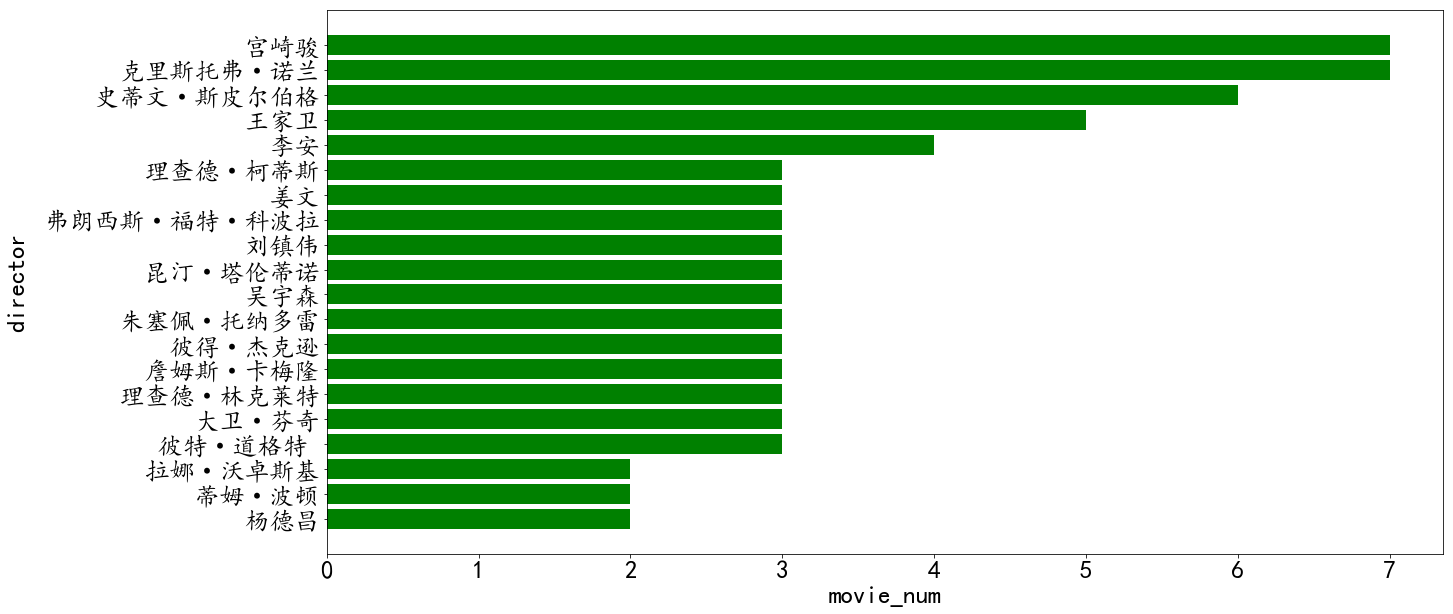

In [83]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
directors=list(movie_data['director'])
dir_dict = {}
for director in directors:
    director_array=director.split('/')
    for item in director_array:
        dir_dict[item]=dir_dict.get(item,0)+1
dir_pd=pd.DataFrame.from_dict(dir_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,8),size=25)
ax.invert_yaxis()
ax.set_xlabel('movie_num',size=25)
ax.set_ylabel('director',size=25)

'float' object has no attribute 'split'


Text(0,0.5,'director')

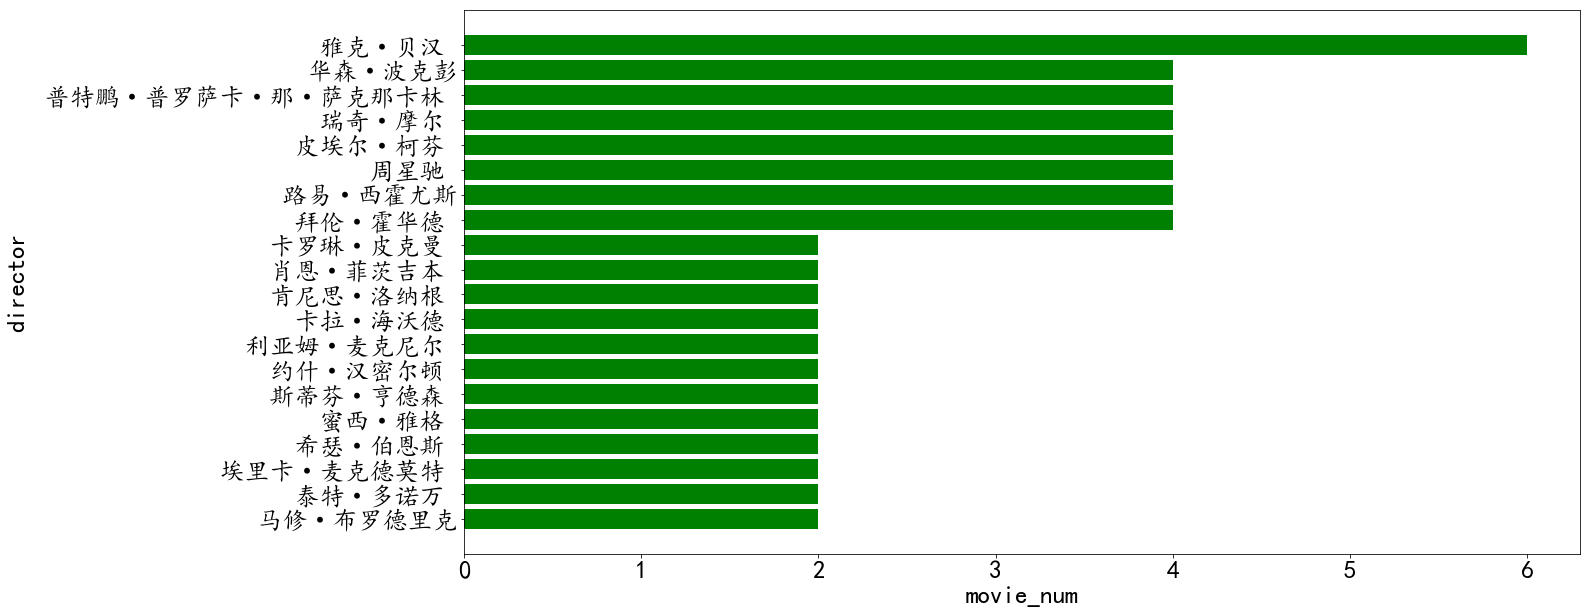

In [51]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
acts=list(movie_data['main_actor'])
act_dict = {}
for act in acts:
    try:
        act_array=act.split('/')
        for item in act_array:
            act_dict[item]=dir_dict.get(item,0)+1
    except Exception as e:
        print(e)
dir_pd=pd.DataFrame.from_dict(act_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,100),size=25)
ax.invert_yaxis()
ax.set_xlabel('movie_num',size=25)
ax.set_ylabel('director',size=25)

In [118]:
data=pd.DataFrame(movie_data.groupby(['year']).agg({'rank':'count','score':'mean','avg_star':'mean'}))

In [126]:
data.plot(x=data.index,y=data['score'],kind='bar')
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.bar(np.arange(1,len(data.index)+1),list(data['score']), color='green',ecolor='black')
ax.set_xticks(np.arange(1,len(data.index)+1))
ax.set_xticklabels(data.index,size=25)
ax.set_xlabel('year',size=25)
ax.set_ylabel('movie_num',size=25)

KeyError: '[ 9.2         9.2         9.2         8.8         8.6         8.7         8.9\n  9.05        9.2         9.5         8.9         9.2         8.9         9.\n  8.4         9.2         9.1         9.          8.8         8.6         8.5\n  8.95        8.85        8.83333333  8.84        8.65        8.7         8.66\n  8.65        8.88571429  9.          8.8125      8.56        8.9         9.02\n  8.64285714  8.6875      8.75454545  8.73        8.65714286  8.71666667\n  8.575       8.7         8.52857143  8.78        8.78333333  8.66153846\n  8.77        8.72        8.72        8.71111111  8.78        8.83333333] not in index'

In [127]:
data['score']

year
1931    9.200000
1936    9.200000
1939    9.200000
1940    8.800000
1942    8.600000
1950    8.700000
1952    8.900000
1953    9.050000
1954    9.200000
1957    9.500000
1960    8.900000
1961    9.200000
1965    8.900000
1966    9.000000
1971    8.400000
1972    9.200000
1974    9.100000
1975    9.000000
1979    8.800000
1980    8.600000
1982    8.500000
1984    8.950000
1986    8.850000
1987    8.833333
1988    8.840000
1989    8.650000
1990    8.700000
1991    8.660000
1992    8.650000
1993    8.885714
1994    9.000000
1995    8.812500
1996    8.560000
1997    8.900000
1998    9.020000
1999    8.642857
2000    8.687500
2001    8.754545
2002    8.730000
2003    8.657143
2004    8.716667
2005    8.575000
2006    8.700000
2007    8.528571
2008    8.780000
2009    8.783333
2010    8.661538
2011    8.770000
2012    8.720000
2013    8.720000
2014    8.711111
2015    8.780000
2016    8.833333
Name: score, dtype: float64

,rank,score,avg_star
year,,,
1957,2,9.500000,4.733000
1931,1,9.200000,4.615000
1954,1,9.200000,4.586000
1936,1,9.200000,4.594000
1972,1,9.200000,4.607000
1961,1,9.200000,4.618000
1939,1,9.200000,4.604000
1974,1,9.100000,4.552000
1953,2,9.050000,4.526500
